# 04 - Loading and Preparing Electric Consumption Data with Spark Core

**Author:** Adrián Romero Flores  
**Repository:** [link](https://github.com/adrrf/bigdata/tree/main/04-spark-core)

---

## Overview

1. [Introduction](#introduction)  
2. [Environment Setup](#environment)  
3. [Data Loading](#data-loading)  
4. [Data Preparation](#data-preparation)  
5. [Results and Conclusions](#results-and-conclusions)

## Introduction


This project aims to load and prepare electric consumption data using Spark Core. The data is provided in CSV format and contains information about electric consumption in a specific region. The goal is to load the data into a Spark DataFrame, perform some transformations, and save the results in a format suitable for further analysis.

The document structure is as follows, in section [Environment Setup](#environment) we will talk about the execution environment. In section [Data Loading](#data-loading), we will load the data into a Spark DataFrame and perform some initial transformations. In section [Data Preparation](#data-preparation), we will perform additional transformations to prepare the data for analysis. Finally, in section [Results and Conclusions](#results-and-conclusions), we will summarize the results and provide conclusions based on the analysis.

## Environment Setup

For the execution of this notebook, we will use the DataBricks platform, which provides a cloud-based environment for running Spark applications. The notebook is written in Python and uses the PySpark library to interact with Spark. Here is a screenshot of the environment and the cluster details:
![Databricks Environment](./assets/env.png)
![Databricks Cluster](./assets/cluster.png)

## Data Loading

First, we need to upload the CSV to the Databricks environment. We can do this by using the "Upload Data" button in the Data section of the workspace.
![Databricks upload button](./assets/upload.png)


Once the file is uploaded, we can use the following code to load the data into a Spark DataFrame. The CSV file contains electric consumption data, and we will use the `spark.read.csv` method to read the file. We will also specify the schema of the DataFrame using the `schema` parameter. The schema is defined using the `StructType` and `StructField` from the `pyspark.sql.types` module.

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType
# define the struct of types
schema = StructType([
    StructField("IDENTIFICADOR", StringType(), True),
    StructField("ANOMES", StringType(), True),
    StructField("CNAE", StringType(), True),
    StructField("PRODUCTO", StringType(), True),
    StructField("MERCADO", StringType(), True),
    StructField("ACTIVA_H1", DoubleType(), True),
    StructField("ACTIVA_H2", DoubleType(), True),
    StructField("ACTIVA_H3", DoubleType(), True),
    StructField("ACTIVA_H4", DoubleType(), True),
    StructField("ACTIVA_H5", DoubleType(), True),
    StructField("ACTIVA_H6", DoubleType(), True),
    StructField("ACTIVA_H7", DoubleType(), True),
    StructField("ACTIVA_H8", DoubleType(), True),
    StructField("ACTIVA_H9", DoubleType(), True),
    StructField("ACTIVA_H10", DoubleType(), True),
    StructField("ACTIVA_H11", DoubleType(), True),
    StructField("ACTIVA_H12", DoubleType(), True),
    StructField("ACTIVA_H13", DoubleType(), True),
    StructField("ACTIVA_H14", DoubleType(), True),
    StructField("ACTIVA_H15", DoubleType(), True),
    StructField("ACTIVA_H16", DoubleType(), True),
    StructField("ACTIVA_H17", DoubleType(), True),
    StructField("ACTIVA_H18", DoubleType(), True),
    StructField("ACTIVA_H19", DoubleType(), True),
    StructField("ACTIVA_H20", DoubleType(), True),
    StructField("ACTIVA_H21", DoubleType(), True),
    StructField("ACTIVA_H22", DoubleType(), True),
    StructField("ACTIVA_H23", DoubleType(), True),
    StructField("ACTIVA_H24", DoubleType(), True),
    StructField("ACTIVA_H25", DoubleType(), True),
    StructField("REACTIVA_H1", DoubleType(), True),
    StructField("REACTIVA_H2", DoubleType(), True),
    StructField("REACTIVA_H3", DoubleType(), True),
    StructField("REACTIVA_H4", DoubleType(), True),
    StructField("REACTIVA_H5", DoubleType(), True),
    StructField("REACTIVA_H6", DoubleType(), True),
    StructField("REACTIVA_H7", DoubleType(), True),
    StructField("REACTIVA_H8", DoubleType(), True),
    StructField("REACTIVA_H9", DoubleType(), True),
    StructField("REACTIVA_H10", DoubleType(), True),
    StructField("REACTIVA_H11", DoubleType(), True),
    StructField("REACTIVA_H12", DoubleType(), True),
    StructField("REACTIVA_H13", DoubleType(), True),
    StructField("REACTIVA_H14", DoubleType(), True),
    StructField("REACTIVA_H15", DoubleType(), True),
    StructField("REACTIVA_H16", DoubleType(), True),
    StructField("REACTIVA_H17", DoubleType(), True),
    StructField("REACTIVA_H18", DoubleType(), True),
    StructField("REACTIVA_H19", DoubleType(), True),
    StructField("REACTIVA_H20", DoubleType(), True),
    StructField("REACTIVA_H21", DoubleType(), True),
    StructField("REACTIVA_H22", DoubleType(), True),
    StructField("REACTIVA_H23", DoubleType(), True),
    StructField("REACTIVA_H24", DoubleType(), True),
    StructField("REACTIVA_H25", DoubleType(), True)
])
# read csv without header
df = spark.read.csv("/FileStore/tables/endesaAgregada.csv", header=False, schema=schema)

To understand the structure and content of the dataframe, we can use the following code that displays the schema, the first 5 rows, the number of rows and columns, and summary statistics for each column.

In [ ]:
# dataframe schema
for field in df.dtypes:
    print(f"column name: {field[0]}, type: {field[1]}")
# print 5 first rows
df.show(5)
# number of rows and columns
rows = df.count()
columns = len(df.columns)
print(f"number of rows: {rows}")
print(f"number of columns: {columns}")
# some stats -> the format is not so good for visualizing...
df.describe().show()

column name: IDENTIFICADOR, type: string
column name: ANOMES, type: string
column name: CNAE, type: string
column name: PRODUCTO, type: string
column name: MERCADO, type: string
column name: ACTIVA_H1, type: double
column name: ACTIVA_H2, type: double
column name: ACTIVA_H3, type: double
column name: ACTIVA_H4, type: double
column name: ACTIVA_H5, type: double
column name: ACTIVA_H6, type: double
column name: ACTIVA_H7, type: double
column name: ACTIVA_H8, type: double
column name: ACTIVA_H9, type: double
column name: ACTIVA_H10, type: double
column name: ACTIVA_H11, type: double
column name: ACTIVA_H12, type: double
column name: ACTIVA_H13, type: double
column name: ACTIVA_H14, type: double
column name: ACTIVA_H15, type: double
column name: ACTIVA_H16, type: double
column name: ACTIVA_H17, type: double
column name: ACTIVA_H18, type: double
column name: ACTIVA_H19, type: double
column name: ACTIVA_H20, type: double
column name: ACTIVA_H21, type: double
column name: ACTIVA_H22, type: do

As we can see in the output, the DataFrame contains negative values in the `ACTIVA` columns, which indicates that there are some errors in the data. We will need to handle these errors in the next section.

## Data Preparation

First of all, let's remove the colums that are not needed for the analysis. We can do this using the `drop` method of the DataFrame.

In [ ]:
# let's remove the ACTIVA_H25 column
df = df.drop("ACTIVA_H25")
# let's remove all REACTIVA_HX columns
reactiva_columns = [f"REACTIVA_H{i}" for i in range(1, 25)]

df = df.drop(*reactiva_columns)
print(f"columns after removal: {len(df.columns)} columns")

columns after removal: 30 columns


Once we have removed the unnecessary columns, we can proceed to handle the null values. We can use the `isnan` and `col(x).isNull()` funtions to check for null values in the DataFrame. In this case there wasn't any null or nan values in the dataset, so we can proceed to the next step.

In [ ]:
from pyspark.sql.functions import col, isnan, when, count

# there is any null value?
null_summary = df.select([
    count(when(col(c).isNull() | isnan(c), c)).alias(c) for c in df.columns
])

null_summary.show()

+-------------+------+----+--------+-------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------------+
|IDENTIFICADOR|ANOMES|CNAE|PRODUCTO|MERCADO|ACTIVA_H1|ACTIVA_H2|ACTIVA_H3|ACTIVA_H4|ACTIVA_H5|ACTIVA_H6|ACTIVA_H7|ACTIVA_H8|ACTIVA_H9|ACTIVA_H10|ACTIVA_H11|ACTIVA_H12|ACTIVA_H13|ACTIVA_H14|ACTIVA_H15|ACTIVA_H16|ACTIVA_H17|ACTIVA_H18|ACTIVA_H19|ACTIVA_H20|ACTIVA_H21|ACTIVA_H22|ACTIVA_H23|ACTIVA_H24|REACTIVA_H25|
+-------------+------+----+--------+-------+---------+---------+---------+---------+---------+---------+---------+---------+---------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+----------+------------+
|            0|     0|   0|       0|      0|        0|       

Finally, we are going to remove the negative values in the `ACTIVA` columns. We can do this using the `filter` method of the DataFrame. We will filter out the rows where the `ACTIVA` columns are less than 0. This will ensure that we only keep the rows with valid values.

In [ ]:
# is there any negative value in activa columns?
df_negatives = df.filter(
    " OR ".join([f"{columna} < 0" for columna in activa_columns])
)
print(f"number of rows with negative values: {df_filtered.count()}")
df = df.subtract(df_negatives)

df.describe().show()

number of rows with negative values: 4
+-------+------------------+------------------+-------+--------+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+-----------------+-----------------+------------+
|summary|     IDENTIFICADOR|            ANOMES|   CNAE|PRODUCTO|MERCADO|         ACTIVA_H1|         ACTIVA_H2|         ACTIVA_H3|         ACTIVA_H4|         ACTIVA_H5|         ACTIVA_H6|         ACTIVA_H7|         ACTIVA_H8|        ACTIVA_H9|        ACTIVA_H10|       ACTIVA_H11|       ACTIVA_H12|       ACTIVA_H13|       ACTIVA_H14|        ACTIVA_H15|        ACTIVA_H16|        ACTIVA_H17|        ACTIVA_H18|        ACTIVA_H19|

Now, let's visualize some data, for example, we can view the aggregated consumption per hour grouped by cnae. We can use the `groupBy` method of the DataFrame to group the data by `CNAE`, and then use the `agg` method to calculate the sum of the `ACTIVA` columns. We will also use the `matplotlib` library to plot the data. 

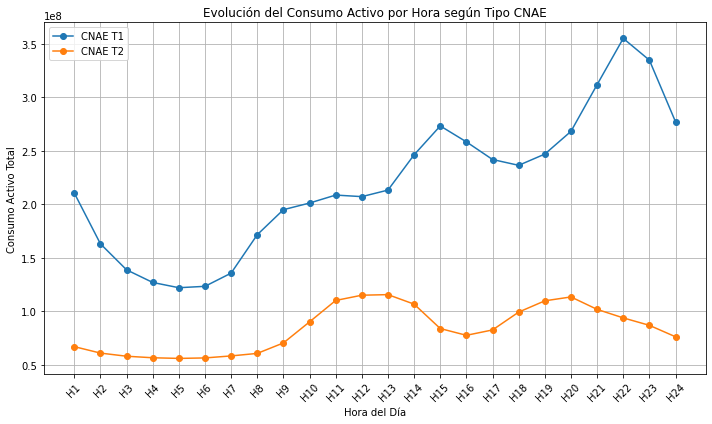

In [ ]:
from pyspark.sql.functions import sum as _sum
import matplotlib.pyplot as plt

activa_columns = [f"ACTIVA_H{i}" for i in range(1, 25)]
agg_cnae = df.groupBy("CNAE").agg(*[_sum(col).alias(col) for col in activa_columns])

agg_cnae_pd = agg_cnae.toPandas()
agg_cnae_pd.set_index("CNAE", inplace=True)
agg_cnae_pd = agg_cnae_pd.transpose()
agg_cnae_pd.index = [f"H{i}" for i in range(1, 25)]

plt.figure(figsize=(10, 6))
for cnae_type in agg_cnae_pd.columns:
    plt.plot(agg_cnae_pd.index, agg_cnae_pd[cnae_type], marker='o', label=f'CNAE {cnae_type}')

plt.title("Evolución del Consumo Activo por Hora según Tipo CNAE")
plt.xlabel("Hora del Día")
plt.ylabel("Consumo Activo Total")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monitoring the Spark Jobs

We can monitor the Spark jobs using the Spark UI that Databricks provide. The Spark UI provides a web interface for monitoring and debugging Spark applications. It shows the status of the jobs, stages, and tasks, as well as the execution plan and performance metrics.
![Spark UI](./assets/sparkmonitoring.png)

## Results and Conclusions

Based on the results of the analysis, we can conclude that the electric consumption data contains some errors, such as negative values in the `ACTIVA` columns. We have successfully loaded and prepared the data for further analysis by removing unnecessary columns, handling null values, and filtering out invalid values. The data is now ready for further analysis and visualization. 

The visualization of aggregated hourly consumption segmented by CNAE, reveals discernible trends and consumption patterns. In the case of CNAE, the profile `T1` demonstrates a consumption pattern typical of residential or human usage: minimal activity during nocturnal hours, with notable increases during the late afternoon and evening—corresponding with common periods of occupancy and usage. Conversely, the `T2` profile reflects a pattern indicative of industrial or commercial activity, characterized by a peak in the morning hours followed by a significant decline during midday, aligning with standard lunch breaks.